In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/kumarmayank/Downloads/Dataset_modified_pom.csv')

In [3]:
df = df.drop(['Product Availibility index','City'],axis=1)

/var/folders/rw/z1h7_zz967sf8xy_601yr3cw0000gn/T/ipykernel_10371/2237237983.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


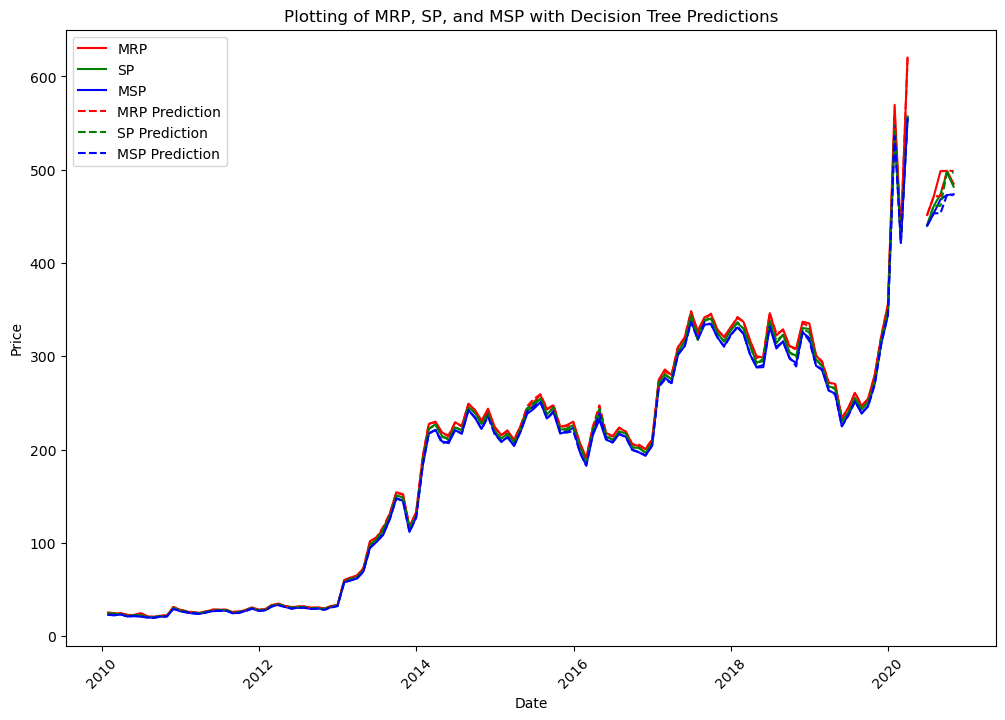

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Date', 'MRP', 'SP', and 'MSP' columns

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Features (X) and target variables (y)
X = df[['Year', 'Month', 'Day']]
y_mrp = df['MRP']
y_sp = df['SP']
y_msp = df['MSP']

# Split the data into training and testing sets
X_train, X_test, y_mrp_train, y_mrp_test, y_sp_train, y_sp_test, y_msp_train, y_msp_test = train_test_split(
    X, y_mrp, y_sp, y_msp, test_size=0.2, random_state=42
)

# Create Decision Tree regressors for each target variable
dt_regressor_mrp = DecisionTreeRegressor(random_state=42)
dt_regressor_sp = DecisionTreeRegressor(random_state=42)
dt_regressor_msp = DecisionTreeRegressor(random_state=42)

# Train the models
dt_regressor_mrp.fit(X_train, y_mrp_train)
dt_regressor_sp.fit(X_train, y_sp_train)
dt_regressor_msp.fit(X_train, y_msp_train)

# Make predictions on the entire dataset
df['MRP_Pred'] = dt_regressor_mrp.predict(X)
df['SP_Pred'] = dt_regressor_sp.predict(X)
df['MSP_Pred'] = dt_regressor_msp.predict(X)

# Downsample by aggregating into monthly averages
df_resampled = df.resample('M', on='Date').mean()

# Create the time series plot
plt.figure(figsize=(12, 8))

# Plotting the data
plt.plot(df_resampled['MRP'], label='MRP', color='red')
plt.plot(df_resampled['SP'], label='SP', color='green')
plt.plot(df_resampled['MSP'], label='MSP', color='blue')

# Plotting the Decision Tree predictions
plt.plot(df_resampled['MRP_Pred'], label='MRP Prediction', linestyle='dashed', color='red')
plt.plot(df_resampled['SP_Pred'], label='SP Prediction', linestyle='dashed', color='green')
plt.plot(df_resampled['MSP_Pred'], label='MSP Prediction', linestyle='dashed', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Plotting of MRP, SP, and MSP with Decision Tree Predictions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()
